In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
from sklearn.model_selection import train_test_split

### Step1. Download the data, read it with pandas

In [2]:
df = pd.read_csv('Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Churn.csv'

### Step2. Check the main data properties: .shape, .head(), .head().T, .info

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# it is easier to scan the dataset if we "Transpose" it: exchange rows and collumns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check number of unique values per column
df.nunique()

In [ ]:
# check number of missings
df.isnull().sum()

# Data Preparation

- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [ ]:
# reformat TotalCharges
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0) # fills missings with 0s


In [ ]:
# Replace Yes and Nos with 1 and 0
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

In [ ]:
df = df.drop('customerID', axis = 1)

- one hot encoding

In [ ]:
# create lists of numeric and categorical features
cat_features = df.select_dtypes(include=object).columns.tolist()
num_features  = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
cat_features

In [ ]:
cat_features = df.select_dtypes(include=object).columns.tolist()

In [ ]:
enc_df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
enc_df.head().T

,0,1,2,3,4
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
Churn,0.00,0.00,1.00,0.00,1.00
gender_Male,0.00,1.00,1.00,1.00,0.00
Partner_Yes,1.00,0.00,0.00,0.00,0.00
Dependents_Yes,0.00,0.00,0.00,0.00,0.00
PhoneService_Yes,0.00,1.00,1.00,0.00,1.00
MultipleLines_No phone service,1.00,0.00,0.00,1.00,0.00


# Train/Test split

- Perform the train/validation/test split with Scikit-Learn

In [ ]:
from sklearn.model_selection import train_test_split

X = enc_df.drop(['Churn'], axis = 1)
y = enc_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((5634, 30), (1409, 30))

In [ ]:
# Culculate overal churn rate
y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(0.2655307064252751, 0.26472675656493966)

# Feature Importance

- Churn rate and risk ratio
- Correlation

In [ ]:
df.Churn.sum()/len(df) # Overal Churn Rate

0.2653698707936959

In [ ]:
df.groupby('PaymentMethod').Churn.agg(['mean', 'count'])

,mean,count
PaymentMethod,,
Bank transfer (automatic),0.167098,1544
Credit card (automatic),0.152431,1522
Electronic check,0.452854,2365
Mailed check,0.191067,1612


In [ ]:
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [ ]:
global_churn = df.Churn.sum()/len(df)
#cat_features.append('SeniorCitizen')

for col in cat_features: 
    grouped_statistics = df.groupby(col).Churn.agg(['mean', 'count'])
    grouped_statistics['difference to global'] = (grouped_statistics['mean'] - global_churn) *100
    display(grouped_statistics)

,mean,count,difference to global
gender,,,
Female,0.269209,3488,0.383884
Male,0.261603,3555,-0.376650


,mean,count,difference to global
Partner,,,
No,0.329580,3641,6.420991
Yes,0.196649,3402,-6.872084


,mean,count,difference to global
Dependents,,,
No,0.312791,4933,4.742153
Yes,0.154502,2110,-11.086750


,mean,count,difference to global
PhoneService,,,
No,0.249267,682,-1.610301
Yes,0.267096,6361,0.172650


,mean,count,difference to global
MultipleLines,,,
No,0.250442,3390,-1.492739
No phone service,0.249267,682,-1.610301
Yes,0.286099,2971,2.072909


,mean,count,difference to global
InternetService,,,
DSL,0.189591,2421,-7.577879
Fiber optic,0.418928,3096,15.355778
No,0.074050,1526,-19.132007


,mean,count,difference to global
OnlineSecurity,,,
No,0.417667,3498,15.229737
No internet service,0.074050,1526,-19.132007
Yes,0.146112,2019,-11.925793


,mean,count,difference to global
OnlineBackup,,,
No,0.399288,3088,13.391769
No internet service,0.074050,1526,-19.132007
Yes,0.215315,2429,-5.005493


,mean,count,difference to global
DeviceProtection,,,
No,0.391276,3095,12.590638
No internet service,0.074050,1526,-19.132007
Yes,0.225021,2422,-4.034923


,mean,count,difference to global
TechSupport,,,
No,0.416355,3473,15.098487
No internet service,0.074050,1526,-19.132007
Yes,0.151663,2044,-11.370647


,mean,count,difference to global
StreamingTV,,,
No,0.335231,2810,6.986145
No internet service,0.074050,1526,-19.132007
Yes,0.300702,2707,3.533201


,mean,count,difference to global
StreamingMovies,,,
No,0.336804,2785,7.143444
No internet service,0.074050,1526,-19.132007
Yes,0.299414,2732,3.404448


,mean,count,difference to global
Contract,,,
Month-to-month,0.427097,3875,16.172690
One year,0.112695,1473,-15.267469
Two year,0.028319,1695,-23.705129


,mean,count,difference to global
PaperlessBilling,,,
No,0.163301,2872,-10.206904
Yes,0.335651,4171,7.028105


,mean,count,difference to global
PaymentMethod,,,
Bank transfer (automatic),0.167098,1544,-9.827143
Credit card (automatic),0.152431,1522,-11.293886
Electronic check,0.452854,2365,18.748425
Mailed check,0.191067,1612,-7.430287


,mean,count,difference to global
SeniorCitizen,,,
0,0.236062,5901,-2.930819
1,0.416813,1142,15.144274


# Numeric Variables

In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].corrwith(df['Churn'])

tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.198324
dtype: float64

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
X_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Alexandra\.virtualenvs\SDA_churn-cSIKUd_A\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.intercept_

array([-0.17744927])

In [ ]:
for i, coef in enumerate(list(model.coef_[0])): 
    print(i, round(coef,3), list(X_train.columns)[i])
    

0 0.222 SeniorCitizen
1 -0.062 tenure
2 0.005 MonthlyCharges
3 0.0 TotalCharges
4 -0.046 gender_Male
5 0.104 Partner_Yes
6 -0.154 Dependents_Yes
7 -0.448 PhoneService_Yes
8 0.273 MultipleLines_No phone service
9 0.21 MultipleLines_Yes
10 0.549 InternetService_Fiber optic
11 -0.115 InternetService_No
12 -0.115 OnlineSecurity_No internet service
13 -0.586 OnlineSecurity_Yes
14 -0.115 OnlineBackup_No internet service
15 -0.251 OnlineBackup_Yes
16 -0.115 DeviceProtection_No internet service
17 -0.088 DeviceProtection_Yes
18 -0.115 TechSupport_No internet service
19 -0.535 TechSupport_Yes
20 -0.115 StreamingTV_No internet service
21 0.142 StreamingTV_Yes
22 -0.115 StreamingMovies_No internet service
23 0.249 StreamingMovies_Yes
24 -0.39 Contract_One year
25 -0.696 Contract_Two year
26 0.408 PaperlessBilling_Yes
27 -0.129 PaymentMethod_Credit card (automatic)
28 0.228 PaymentMethod_Electronic check
29 -0.069 PaymentMethod_Mailed check


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
model.predict_proba(X_train)

array([[0.90401924, 0.09598076],
       [0.78848331, 0.21151669],
       [0.29982694, 0.70017306],
       ...,
       [0.80849019, 0.19150981],
       [0.2057834 , 0.7942166 ],
       [0.96680561, 0.03319439]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[3724,  414],
       [ 694,  802]], dtype=int64)

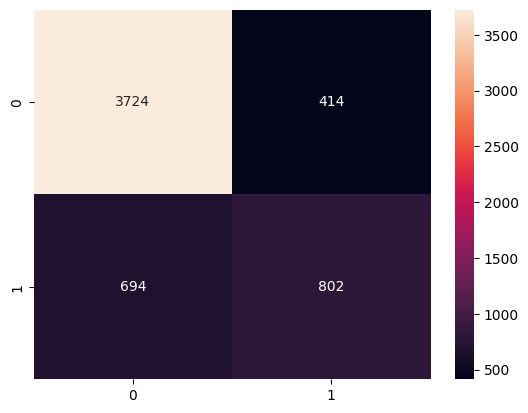

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8033368832090877
Precision: 0.6595394736842105
Recall: 0.536096256684492
F1-Score: 0.5914454277286135


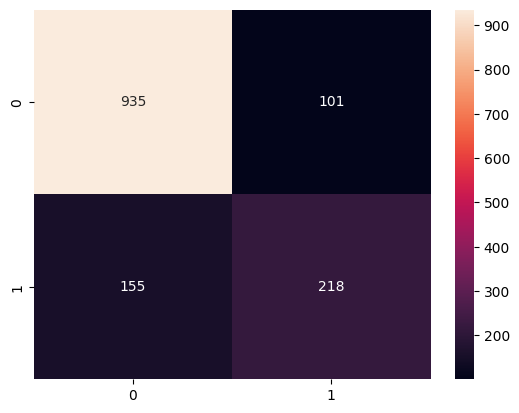

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f'Accuracy: {accuracy_test, accuracy_train}')
print(f'Precision: {precision_test, precision_train}')
print(f'Recall: {recall_test, recall_train}')
print(f'F1-Score: {f1_test, f1_train}')

Accuracy: (0.8183108587650816, 0.8033368832090877)
Precision: (0.6833855799373041, 0.6595394736842105)
Recall: (0.5844504021447721, 0.536096256684492)
F1-Score: (0.630057803468208, 0.5914454277286135)


# Regularization

In [ ]:
model1 = LogisticRegression(penalty='l1', solver='liblinear')
model1.fit(X_train, y_train)
list(zip(model1.coef_[0], X_train.columns.to_list()))

In [ ]:
model2 = LogisticRegression(penalty='l2', solver='liblinear')
model2.fit(X_train, y_train)
list(zip(model2.coef_[0], X_train.columns.to_list()))

In [ ]:
y_pred_test_l1 = model1.predict(X_test)
y_pred_test_l2 = model2.predict(X_test)

In [ ]:
accuracy_testl1 = accuracy_score(y_test, y_pred_test_l1)
precision_testl1 = precision_score(y_test, y_pred_test_l1)
recall_testl1 = recall_score(y_test, y_pred_test_l1)
f1_testl1 = f1_score(y_test, y_pred_test_l1)

accuracy_testl2 = accuracy_score(y_test, y_pred_test_l2)
precision_testl2 = precision_score(y_test, y_pred_test_l2)
recall_testl2 = recall_score(y_test, y_pred_test_l2)
f1_testl2 = f1_score(y_test, y_pred_test_l2)

print(f'Accuracy: {accuracy_test, accuracy_testl1, accuracy_testl2}')
print(f'Precision: {precision_test, precision_testl1, precision_testl2}')
print(f'Recall: {recall_test, recall_testl1, recall_testl2}')
print(f'F1-Score: {f1_test, f1_testl1, f1_testl2}')

Accuracy: (0.8183108587650816, 0.8218594748048261, 0.8161816891412349)
Precision: (0.6833855799373041, 0.6871165644171779, 0.6759259259259259)
Recall: (0.5844504021447721, 0.6005361930294906, 0.5871313672922251)
F1-Score: (0.630057803468208, 0.6409155937052933, 0.6284074605451937)


# Other models

- decision trees
- naive bayes
- support vector machines (SVM)
- KNN
- ensemble methods

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model3 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=40)
model3.fit(X_train, y_train)

y_pred_train_tree = model3.predict(X_train)
y_pred_test_tree = model3.predict(X_test)

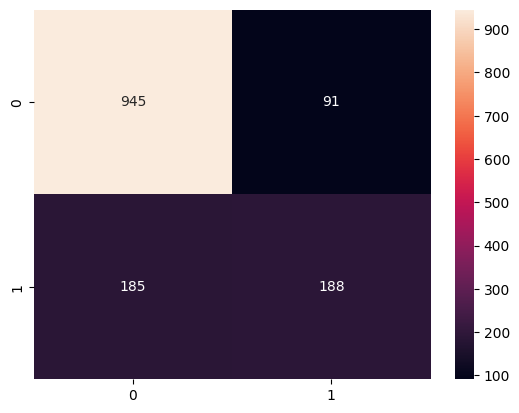

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_tree), annot=True, fmt='d')
plt.show()

In [ ]:
accuracy_test_tree = accuracy_score(y_test, y_pred_test_tree)
precision_testl2_tree = precision_score(y_test, y_pred_test_tree)
recall_testl2_tree = recall_score(y_test, y_pred_test_tree)
f1_testl2_tree = f1_score(y_test, y_pred_test_tree)

print(f'Accuracy: {accuracy_test, accuracy_testl1, accuracy_testl2, accuracy_test_tree}')
print(f'Precision: {precision_test, precision_testl1, precision_testl2, precision_testl2_tree}')
print(f'Recall: {recall_test, recall_testl1, recall_testl2, recall_testl2_tree}')
print(f'F1-Score: {f1_test, f1_testl1, f1_testl2, f1_testl2_tree}')

Accuracy: (0.8183108587650816, 0.8218594748048261, 0.8161816891412349, 0.8041163946061036)
Precision: (0.6833855799373041, 0.6871165644171779, 0.6759259259259259, 0.6738351254480287)
Recall: (0.5844504021447721, 0.6005361930294906, 0.5871313672922251, 0.5040214477211796)
F1-Score: (0.630057803468208, 0.6409155937052933, 0.6284074605451937, 0.5766871165644172)


In [ ]:
accuracy_test_tree = accuracy_score(y_train, y_pred_train_tree)
precision_testl2_tree = precision_score(y_train, y_pred_train_tree)
recall_testl2_tree = recall_score(y_train, y_pred_train_tree)
f1_testl2_tree = f1_score(y_train, y_pred_train_tree)

print(f'Accuracy: {accuracy_test, accuracy_testl1, accuracy_testl2, accuracy_test_tree}')
print(f'Precision: {precision_test, precision_testl1, precision_testl2, precision_testl2_tree}')
print(f'Recall: {recall_test, recall_testl1, recall_testl2, recall_testl2_tree}')
print(f'F1-Score: {f1_test, f1_testl1, f1_testl2, f1_testl2_tree}')

Accuracy: (0.8183108587650816, 0.8218594748048261, 0.8161816891412349, 0.81008164714235)
Precision: (0.6833855799373041, 0.6871165644171779, 0.6759259259259259, 0.6861888111888111)
Recall: (0.5844504021447721, 0.6005361930294906, 0.5871313672922251, 0.5247326203208557)
F1-Score: (0.630057803468208, 0.6409155937052933, 0.6284074605451937, 0.5946969696969697)


# K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

In [ ]:
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
precision_test_knn = precision_score(y_test, y_pred_test_knn)
recall_test_knn = recall_score(y_test, y_pred_test_knn)
f1_test_knn = f1_score(y_test, y_pred_test_knn)

print(f'Accuracy: {accuracy_test, accuracy_testl1, accuracy_testl2, accuracy_test_tree, accuracy_test_knn}')
print(f'Precision: {precision_test, precision_testl1, precision_testl2, precision_testl2_tree, precision_test_knn}')
print(f'Recall: {recall_test, recall_testl1, recall_testl2, recall_testl2_tree, recall_test_knn}')
print(f'F1-Score: {f1_test, f1_testl1, f1_testl2, f1_testl2_tree, f1_test_knn}')

Accuracy: (0.8183108587650816, 0.8218594748048261, 0.8161816891412349, 0.81008164714235, 0.7778566359119943)
Precision: (0.6833855799373041, 0.6871165644171779, 0.6759259259259259, 0.6861888111888111, 0.5993377483443708)
Recall: (0.5844504021447721, 0.6005361930294906, 0.5871313672922251, 0.5247326203208557, 0.48525469168900803)
F1-Score: (0.630057803468208, 0.6409155937052933, 0.6284074605451937, 0.5946969696969697, 0.5362962962962963)


In [ ]:
y_pred_test_knn

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
i = 190

print('KNN said: ', y_pred_test_knn[i])
print('Logit l1 said: ', y_pred_test_l1[i])
print('Decision tree said: ', y_pred_test_tree[i])
print('Logit said: ', y_pred_test[i])
print('real class was: ', y_test.to_list()[i])

KNN said:  0
Logit l1 said:  0
Decision tree said:  0
Logit said:  0
real class was:  1


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth = 7, min_samples_leaf=20)
model_rf.fit(X_train, y_train)
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

In [ ]:
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
precision_train_rf = precision_score(y_train, y_pred_train_rf)
recall_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)

accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)

print(f'Accuracy: {accuracy_testl1, accuracy_test_rf, accuracy_train_rf}')
print(f'Precision: {precision_test, precision_test_rf, precision_train_rf}')
print(f'Recall: {recall_testl1, recall_test_rf, recall_train_rf}')
print(f'F1-Score: {f1_testl1, f1_test_rf, f1_train_rf}')

Accuracy: (0.8218594748048261, 0.8005677785663591, 0.8084842030528931)
Precision: (0.6833855799373041, 0.6796875, 0.7095477386934673)
Recall: (0.6005361930294906, 0.46648793565683644, 0.47192513368983957)
F1-Score: (0.6409155937052933, 0.5532591414944357, 0.5668406262545163)


In [ ]:
model_ac = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 10, min_samples_leaf=20), n_estimators=10)
model_ac.fit(X_train, y_train)
y_pred_train_ac = model_ac.predict(X_train)
y_pred_test_ac = model_ac.predict(X_test)

In [ ]:
accuracy_train_ac = accuracy_score(y_train, y_pred_train_ac)
precision_train_ac = precision_score(y_train, y_pred_train_ac)
recall_train_ac = recall_score(y_train, y_pred_train_ac)
f1_train_ac = f1_score(y_train, y_pred_train_ac)

accuracy_test_ac = accuracy_score(y_test, y_pred_test_ac)
precision_test_ac = precision_score(y_test, y_pred_test_ac)
recall_test_ac = recall_score(y_test, y_pred_test_ac)
f1_test_ac = f1_score(y_test, y_pred_test_ac)

print(f'Accuracy: {accuracy_testl1, accuracy_test_ac, accuracy_train_ac}')
print(f'Precision: {precision_test, precision_test_ac, precision_train_ac}')
print(f'Recall: {recall_testl1, recall_test_ac, recall_train_ac}')
print(f'F1-Score: {f1_testl1, f1_test_ac, f1_train_ac}')

Accuracy: (0.8218594748048261, 0.7402413058907026, 0.9219027334043308)
Precision: (0.6833855799373041, 0.509641873278237, 0.8557951482479784)
Recall: (0.6005361930294906, 0.4959785522788204, 0.8489304812834224)
F1-Score: (0.6409155937052933, 0.5027173913043478, 0.8523489932885906)
